# TP Noté 1 : Dans la peau d'un influenceur data-scientist

```Ecole Centrale Nantes
Option InfoIA
PAPY: Programmation avancée python
TP3.2
Année 2022-2023
Auteur: Lucas Lestandi
lucas.lestandi@ec-nantes.fr
V1.0
```

<div class="alert alert-danger" role="alert">
   <b> Attention : </b>  il s'agit d'un TP noté. Le notebook de rapport, ainsi que les fichiers/modules `.py` seront à déposer sur Hippocampus avant la séance suivante. Autrement dit, mercredi 23:59. <br>
    Bien entendu, vous pouvez travailler en groupe, mais pas plus de 3. Merci de m'informer pendant la séance des groupes, via slack par exemple.
</div>

*Dans ce TP, vous mettrez en oeuvre les connaissances acquises au cours de précédentes séances. Vous utiliserez à bon escient les paradigmes de programmation d'un vrai projet : des fonctions, des classes, et une structure de code utilisant des modules externes.*

Récemment, l'actualité a été marquée par de [nombreux articles](https://www.challenges.fr/economie/i-fly-bernard-lavion-de-bernard-ces-comptes-twitter-qui-font-enfler-la-polemique-sur-les-jets-prives_825097) relatant le mécontentement certains milliardaires face aux comptes twitter (et autre) relatant leurs déplacements en jet privé. On notera le cas [I fly Bernard](https://twitter.com/i_fly_Bernard), [l'avion de Bernard](https://www.instagram.com/laviondebernard/) coté français et [ElonJet](https://twitter.com/ElonJet) outre atlantique avec par Jack Sweeney. Les codes respectifs sont plus ou moins disponibles en ligne et plus ou moins faciles à suivre.  Dans tous les cas, ils s'appuient sur des données publiques puisque tous les avions doivent être équipés d'un émetteur ADSB donnant leur position. Ces données sont extraites des bases et traitées avec le langage le plus simple pour ces taches : python, évidemment. 

Le but de ce TP est de reproduire, dans un notebook, la capture des données ADSB, puis leur traitement pour afficher un trajet (avec matplotlib) et effectuer quelques traitements, par exemple pour une flotte complète. On proposera notre propre structure (de classe) simplifiée mais modulaire. On commencera par une rapide analyse du code source de deux comptes automatisés cité au-dessus afin de déterminer comment en tirer profit pour accélérer notre développement.

## Analyse de code [1h-2h]
Les codes ["L'avion de Bernard"](https://github.com/laviondebernard/instagram) et ["ElonJet"](https://github.com/Jxck-S/plane-notify) sont très différent. 
Pour les deux codes, on proposera une analyse rapide en répondant aux questions suivantes.
1. **Récupération des sources** avec git
1. **Description de la structure du projet**, 
    - nombre de fichiers python, autres langages, documents
    - documentation et la facilité d'installation
    - Licence : A-t-on le droit d'utiliser ce code pour usage personnel? commercial?
1. Peut on **exécuter** le script principal et/ou un exemple?
1. **Que fait le code ?** 
    - décrire la trame en quelques points clés
    - quelles sont les dépendances principales
    - Si la structure est complexe, on pourra utiliser la commande suivante pour dessiner un diagramme de classe et le commenter.
    ```shell
    $ pyreverse -o svg NOM-PAQUET .
    ```
    > `pyverse` fait parti du paquet pylint.
    - commenter la qualité de l'implementation : respet des PEP, facilité de lecture, commentaires
    
1. **Evaluation de l'utilité**:
    - ce code est-il pret à l'usage?
    - ce code peut-il etre facilement utilisé?
    - ce code est-il modulaire? 
    - dans le contexte de ce "projet" peut-on utiliser ce code comme squelette? 

**Question concluion:** On comparera ces deux paquets dans un court paragraphe avant de conclure sur leur utilisation dans la partie suivante.

<br>

#### **Analyse de L'avion de Bernard**

1. **Récupération des sources avec git**

On a récupéré le code de GitHub en utilisant la commande suivante :

`git clone https://github.com/laviondebernard/instagram.git`

2. **Description de la structure du projet,**

* nombre de fichiers python, autres langages, documents

Le projet contient deux fichiers `CSV`, un fichier `Python`, un fichier `Text`, un fichier `Markdown`, deux fichiers `PNG`, un fichier `.log` vide et enfin un fichier appelé `img_created_here` sans type spécifié et vide.

* documentation et la facilité d'installation

D'après ce que l'on peut voir, ce projet est principalement utilisé pour poster des images sur [Instagram](https://instagram.com/laviondebernard), il n'y a donc pas de méthode très détaillée pour son installation. 

La documentation consiste en un fichier `README.md` qui détaille brièvement son but, son fonctionnement et des conseils ou de l'aide sur la façon de l'utiliser de manière très vague.

Le créateur n'offre aucune assistance pour l'installation ou l'utilisation. Il n'y a qu'une seule [issue fermée](https://github.com/laviondebernard/instagram/issues/2), qui a été répondue par un non-membre du projet, et une [issue ouverte](https://github.com/laviondebernard/instagram/issues/3) écrite le 26 juillet 2022, qui n'a pas encore été répondue. Nous supposons donc que son objectif en mettant le code en ligne est simplement de le partager. 

* Licence : A-t-on le droit d'utiliser ce code pour usage personnel? commercial?

Oui, le projet est sous licence MIT et mentionne que le code peut être utilisé à des fins personnelles et/ou commerciales. Celui qui l'utilise doit ajouter la licence et l'autorisation détaillées dans le fichier [LICENSE.text](https://github.com/laviondebernard/instagram/blob/main/LICENSE.txt).


3. Peut on **exécuter** le script principal et/ou un exemple?

Oui, mais il faut avoir les librairies python suivantes : `os`, `sys`, `re`, `random`, `requests`, `time`, `datetime`, `locale`, `csv`, `folium`, `PIL`, `selenium`, `geopy`, `smtplib` et `ssl`.

De plus, selon la section d'aide écrite dans le fichier `README.md`, les paramètres suivants doivent être modifiés pour fonctionner correctement : 

- ligne 22 : chemin absolu vers le fichier bernard.py
- ligne 39,40,41 : infos sur l'avion (y compris émissions de CO2 par km)
- ligne 46 : chemin absolu vers le geckodriver
- ligne 50 : chemin absolu vers votre profil firefox (pour garder les sessions instagram ouvertes avec des cookies)
- ligne 56,57 : identifiants instagram
- ligne 78,79,80,81 : identifiants mail (pour recevoir confirmation du déroulé du script par mail)
- ligne 107 : URL de votre .json de test (optionnel)
- ligne 314 : changer les dimensions pour adapter la taille de l'image de sortie

1. **Que fait le code ?** 

- décrire la trame en quelques points clés

Le script obtient les informations de vol à partir de l'API `OpenSkyNetwork`, selon le numéro `icao24` correspondant. Il crée une image par vol, en utilisant la librairie `folium`, et publie l'image sur Instagram. Pour cela, il faut avoir **Firefox**, **geckodriver** et ajouter au code quelques données et identifiants de notre compte Instagram. C'est important de mettre la compte Instagram en français.

Sur Instagram, le code ajoute également des hashtags aléatoires et calcule les émissions de CO2. L'utilisateur doit enregistrer manuellement les tonnes de CO2 par kilomètre de l'avion correspondant dans une variable appelée `tonPerKm`, à la ligne 41.

Enfin, le code envoie toutes les informations par courrier électronique. L'utilisateur doit enregistrer manuellement les variables dans le fichier `bernard.py`, dans les variables `smtp`, `port`, `email` et `password`.

- quelles sont les dépendances principales

    folium PIL selenium

- Si la structure est complexe, on pourra utiliser la commande suivante pour dessiner un diagramme de classe et le commenter.
```shell
$ pyreverse -o svg NOM-PAQUET .
```
> `pyverse` fait parti du paquet pylint.
- commenter la qualité de l'implementation : respet des PEP, facilité de lecture, commentaires

Tout d'abord, je ne pense pas que ce soit très sécurisé de mettre les identifiants des comptes Instagram et notre email directement dans le code. On peut utiliser une librairie comme `dotenv` ou simplement ajouter les identifiants dans un autre fichier python.

En ce qui concerne les normes PEP8, les éléments suivants ne sont pas respectés : 

* **E261** au moins deux espaces avant le commentaire en ligne
* il y a des parenthèses redondantes 
* **E501** ligne trop longue ( > 120 caractères)
* **E701** plusieurs déclarations sur une ligne
* **E231** espace blanc manquant après ','.
* **E722** ne pas utiliser le mot "except" (sauf)
* **E225** espaces manquants autour de l'opérateur
* Point-virgule de fin dans la déclaration 
* **E101** l'indentation contient un mélange d'espaces et de tabulations
* **E122** La ligne de continuation n'a pas d'indentation ou est en dehors de l'indentation.


5. **Evaluation de l'utilité**:

- ce code est-il pret à l'usage?

Non, il faut installer plusieurs dépendances et ajouter des informations d'identification pour pouvoir l'utiliser.

- ce code peut-il etre facilement utilisé?

Non. Bien que le code soit commenté, il existe des lignes de code complexes qui ne sont pas expliquées. Pour le comprendre pleinement, il faut tester chaque partie séparément et avec différents types de tests.

- ce code est-il modulaire? 

Non. Il y a un seul fichier de code (bernard.py) qui contient toute la logique du projet. Le code ne comporte pas non plus de fonctions ou de classes. 

- dans le contexte de ce "projet" peut-on utiliser ce code comme squelette? 

Oui, on pourrait utiliser une partie de ce code pour créer la section **Données historiques** de ce TP. En particulier, pour tracer le vol d'un avion.



<br>

## Une visu maison.
<div class="alert alert-warning" role="alert">
Comme vous le voyez, tout n'est pas bon à prendre dans un code trouvé en ligne. Cela peut être dû à plusieurs facteurs: inadéquation avec le projet en cours, trop grande complexité, mauvaise organisation, difficulté d'installation, etc. 
</div>

Nous allons réduire la complexité au minimum afin d'obtenir des résultats exploitables en quelques heures.

Pour cela, on utilisera tout de même certains paquets généralistes que l'on maitrise déjà (en théorie) et quelques autres spécifiques au problème, en particulier sous forme d'API.

**Pré-requis:**
- bibliothèques à installer : pandas, numpy, matplolib, cartopy/cartes

```mamba install -c conda-forge cartopy```

**Objectifs:**
- Installer openskyAPI et récupérer les données ADSB publiques grâce à l'API d'*openskynetworks*
- Créer une structure de classe permettant de représenter : des avions et des trajets. En option, pourrait aimer représenter les aéroports.
- Proposer une visualisation avec matplotlib-cartopy d'un trajet
- Extraire un certain nombre d'informations issues des données de vol

**Les données**: Le système ADS-B est publique mais la conservation des données nécessites des moyens, ne serait-ce que pour le stockage et l'accés web. Pour cette raison les services proposent plusieurs version selon le degrès d'implication des utilisateurs (authentifié ou non, payant ou non). 
- [openskynetworks](https://opensky-network.org/) est une association à but non lucratif qui récolte les signauax ADS-B (entre autre) et les rends accessible gratuitement et sur enregistrement. Il semblerait que l'API python ne permette d'accéder qu'aux données en temps réel. D'autres modes d'accés son possible (requettes web, etc.), en particulier à l'aide d'un compte. Pour ce TP, nous ferons sans. Les données retenues: 
    - l'api `opensky_api` pour récupérer des données en direct et tracer une carte "radar" autour de sa position
    - des données historiques téléchargées à l'avance sur ce même site au format CSV pour la semaine du 27 Juin 2022. 

## Exploration des données

> Installation openskyAPI
> - cloner les sources
> - Suivre le readme.md et installer avec pip
> - Explorer un peu les données : 
>   1. Combien d'avions volent en ce moment dans le monde?
>   1. Combien sont aux sol mais avec le transpondeur allumé?
>   1. Quelle est la vitesse moyenne des appareils dans le "carré" (42,51,-5,8)?
>   1. Proposer une ou deux autres métriques intéressantes. 
>   1. Recharger les données, les résultats sont-ils les mêmes? 

In [1]:
from opensky_api import OpenSkyApi
import time

#### **Vérification de l'environnement de programmation**

In [2]:
!which python
!python -V
!ls

/home/nucontreras/anaconda3/envs/tp3_2/bin/python
Python 3.10.4
carte.jpg  states	 TP3.2-eleve.html   trajectoire.jpg
src	   states_carre  TP3.2-eleve.ipynb


In [3]:
# Les informations d'identification d'OpenSky Network sont chargées à partir du fichier .env.

from dotenv import load_dotenv
import os

env_path = os.path.join('.env')
load_dotenv(env_path)
USERNAME = os.getenv('USERNAME')
PASSWORD = os.getenv('PASSWORD')

#### **Connexion API**

In [4]:
# api = OpenSkyApi()
api = OpenSkyApi(USERNAME, PASSWORD)

#### **Q1 : Combien d'avions volent en ce moment dans le monde?**

In [5]:
states = api.get_states()

In [6]:
type(states)

opensky_api.OpenSkyStates

In [7]:
print(f"Combien d'avions volent en ce moment dans le monde? : \n {len(states.states)} des avions")

Combien d'avions volent en ce moment dans le monde? : 
 5838 des avions


#### **Q2 : Combien sont aux sol mais avec le transpondeur allumé?**

In [8]:
quantite = 0

for s in states.states:
    if s.on_ground and s.squawk:
        quantite += 1 

print(f"Combien sont aux sol mais avec le transpondeur allumé? : \n {quantite} des avions")

Combien sont aux sol mais avec le transpondeur allumé? : 
 121 des avions


#### **Q3 : Quelle est la vitesse moyenne des appareils dans le "carré" (42,51,-5,8)?**

In [9]:
states_carre = api.get_states(bbox=(42,51,-5,8)) # on récupére tous les vols en ce moment sur un zone couvrant l'essentiel de la France.

In [10]:
type(states_carre)

opensky_api.OpenSkyStates

In [11]:
vitesse_som = 0
nombre = 0
for s in states_carre.states:
    if s.velocity:
        vitesse_som += s.velocity
        nombre += 1
        
print(f"Quelle est la vitesse moyenne des appareils dans le 'carré' (42,51,-5,8)? : \n {vitesse_som / nombre} m/s")

Quelle est la vitesse moyenne des appareils dans le 'carré' (42,51,-5,8)? : 
 186.20379999999994 m/s


#### **Q4 : Proposer une ou deux autres métriques intéressantes**

L'attribut `origin_country` est important car il est possible d'obtenir des données sur le nombre d'avions au départ de chaque pays. 

D'autre part, `true_track` est également intéressant car il indique dans quelle direction et quel sens l'avion se dirige. 

In [13]:
# Affichage des dix premières données

for i in range(10):
    s = states.states[i]
    print(f"Origin country : {s.origin_country:15s} true_track : {str(s.true_track):10s}")

Origin country : United States   true_track : 293.16    
Origin country : United States   true_track : 288.17    
Origin country : Australia       true_track : 253.12    
Origin country : Thailand        true_track : 359.75    
Origin country : United States   true_track : 43.63     
Origin country : Australia       true_track : 30.94     
Origin country : United States   true_track : 214.07    
Origin country : Australia       true_track : 351.87    
Origin country : United States   true_track : 249.17    
Origin country : United States   true_track : 118.05    


#### **Q5 : Recharger les données, les résultats sont-ils les mêmes?**

In [14]:
states2 = api.get_states()

In [15]:
print(f"Q1 : Combien d'avions volent en ce moment dans le monde? : \n {len(states2.states)} des avions")

quantite = 0

for s in states2.states:
    if s.on_ground and s.squawk:
        quantite += 1 

print(f"Q2 : Combien sont aux sol mais avec le transpondeur allumé? : \n {quantite} des avions")

Q1 : Combien d'avions volent en ce moment dans le monde? : 
 5852 des avions
Q2 : Combien sont aux sol mais avec le transpondeur allumé? : 
 124 des avions


In [18]:
states_carre2 = api.get_states(bbox=(42,51,-5,8))

In [19]:
vitesse_som = 0
nombre = 0
for s in states_carre2.states:
    if s.velocity:
        vitesse_som += s.velocity
        nombre += 1
        
print(f"Quelle est la vitesse moyenne des appareils dans le 'carré' (42,51,-5,8)? : \n {vitesse_som / nombre} m/s")

Quelle est la vitesse moyenne des appareils dans le 'carré' (42,51,-5,8)? : 
 185.1748979591837 m/s


**Après avoir rechargé les données, nous pouvons voir que les données ont changé. C'est évident puisque nous utilisons des données en temps réel.
<br>
<br>


Attention le nombre de requettes étant limité, on ne rejouera pas la cellule précédente. On pourra récuppérer les états correspondants aux avions avec `states.states` qui est une liste de vecteurs d'états. On retrouve la description dans la documentation.
> Represents the state of a vehicle at a particular time. It has the following fields:
> -  **icao24** - ICAO24 address of the transmitter in hex string representation.
> -  **callsign** - callsign of the vehicle. Can be None if no callsign has been received.
> -  **origin_country** - inferred through the ICAO24 address
> -  **time_position** - seconds since epoch of last position report. Can be None if there was no position report received by OpenSky within 15s before.
> -  **last_contact** - seconds since epoch of last received message from this transponder
> -  **longitude** - in ellipsoidal coordinates (WGS-84) and degrees. Can be None
> -  **latitude** - in ellipsoidal coordinates (WGS-84) and degrees. Can be None
> -  **geo_altitude** - geometric altitude in meters. Can be None
> -  **on_ground** - true if aircraft is on ground (sends ADS-B surface position reports).
> -  **velocity** - over ground in m/s. Can be None if information not present
> -  **true_track** - in decimal degrees (0 is north). Can be None if information not present.
> -  **vertical_rate** - in m/s, incline is positive, decline negative. Can be None if information not present.
> -  **sensors** - serial numbers of sensors which received messages from the vehicle within the validity period of this state vector. Can be None if no filtering for sensor has been requested.
> -  **baro_altitude** - barometric altitude in meters. Can be None
> -  **squawk** - transponder code aka Squawk. Can be None
> -  **spi** - special purpose indicator
> -  **position_source** - origin of this state's position: 0 = ADS-B, 1 = ASTERIX, 2 = MLAT, 3 = FLARM

On va se satisfaire d'extraire les positions, vitesses et orientation pour les positionner sur la carte ainsi que icao24 et calssign pour pouvoir identifier les appareils et les croiser avec d'autres bases de données.
<div class="alert alert-info" role="alert">
    Créer un classe représentant les avions avec les caractéristiques <b>reduitess</b> listées au dessus. Rappel, il est possible de créer plusieurs méthodes d'instanciation avec le décorateur <code>@classmethod</code>. <b>Ne pas oublier la documentation de votre code, il sera relu!</b> 
</div>
On instanciera cette classe pour tous les `states` obtenu avec opensky_api afin de les sauvegarder (format de votre choix) et surtout de les afficher sur une carte.

In [20]:
class Avion:
    
    """ Il représente les avions en stockant des informations sur leur position, leur vitesse, leur orientation et leur identification. """
    
    def __init__(self, time, icao24, callsign, longitude, latitude, geo_altitude, velocity, true_track, vertical_rate, on_ground):
        self.time = time
        self.icao24 = icao24
        self.callsign = callsign
        self.longitude = longitude
        self.latitude = latitude
        self.geo_altitude = geo_altitude
        self.velocity = velocity
        self.true_track = true_track
        self.vertical_rate = vertical_rate
        self.on_ground = on_ground
        

On écrira une fonction d'affichage qui place les avions sur la carte et représente leur vitesse (taille) et leur direction de manière similaire à ce qui est proposé dans l'exemple.
```python
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.colors import Normalize
from matplotlib.textpath import TextPath
from matplotlib.transforms import Affine2D
from avion import Avion
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

def plot(liste_avion, *args, **kwargs):
    fig = plt.figure(figsize=(15,15))
    tile=cimgt.GoogleTiles("RGB")
    # Create a GeoAxes in the tile's projection.
    ax = fig.add_subplot(1, 1, 1, projection=tile.crs)
    # Limit the extent of the map to a small longitude/latitude range.
    ax.set_extent([-5, 8, 42, 51], crs=ccrs.Geodetic())
    # Add the Stamen data at zoom level 8.
    ax.add_image(tile, 8)

    SUCCESS_SYMBOLS = TextPath((0, 0), "✈") # Définie le marquer avion
    #boucle de plot a écrire

    fig.savefig("carte.jpg")
    plt.show()
```

On obtiendra un résultat similaire à celui ci! Ne pas hésiter à utiliser d'autres fonds de cartes, icones ou types de représentation (vecteurs...)
![Vols instantanés 5 Octobre 22](carte.jpg)

In [21]:
# Création d'une liste avec des instances de la classe avion.

ciel = list()
for s in states_carre.states:
    ciel.append(Avion(s.time_position, s.icao24, s.callsign, s.longitude, s.latitude, s.geo_altitude, s.velocity, s.true_track, s.vertical_rate, s.on_ground))

In [22]:
# Importation des librairies à utiliser pour afficher les avions sur la carte.

import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.colors import Normalize
from matplotlib.textpath import TextPath
from matplotlib.transforms import Affine2D
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

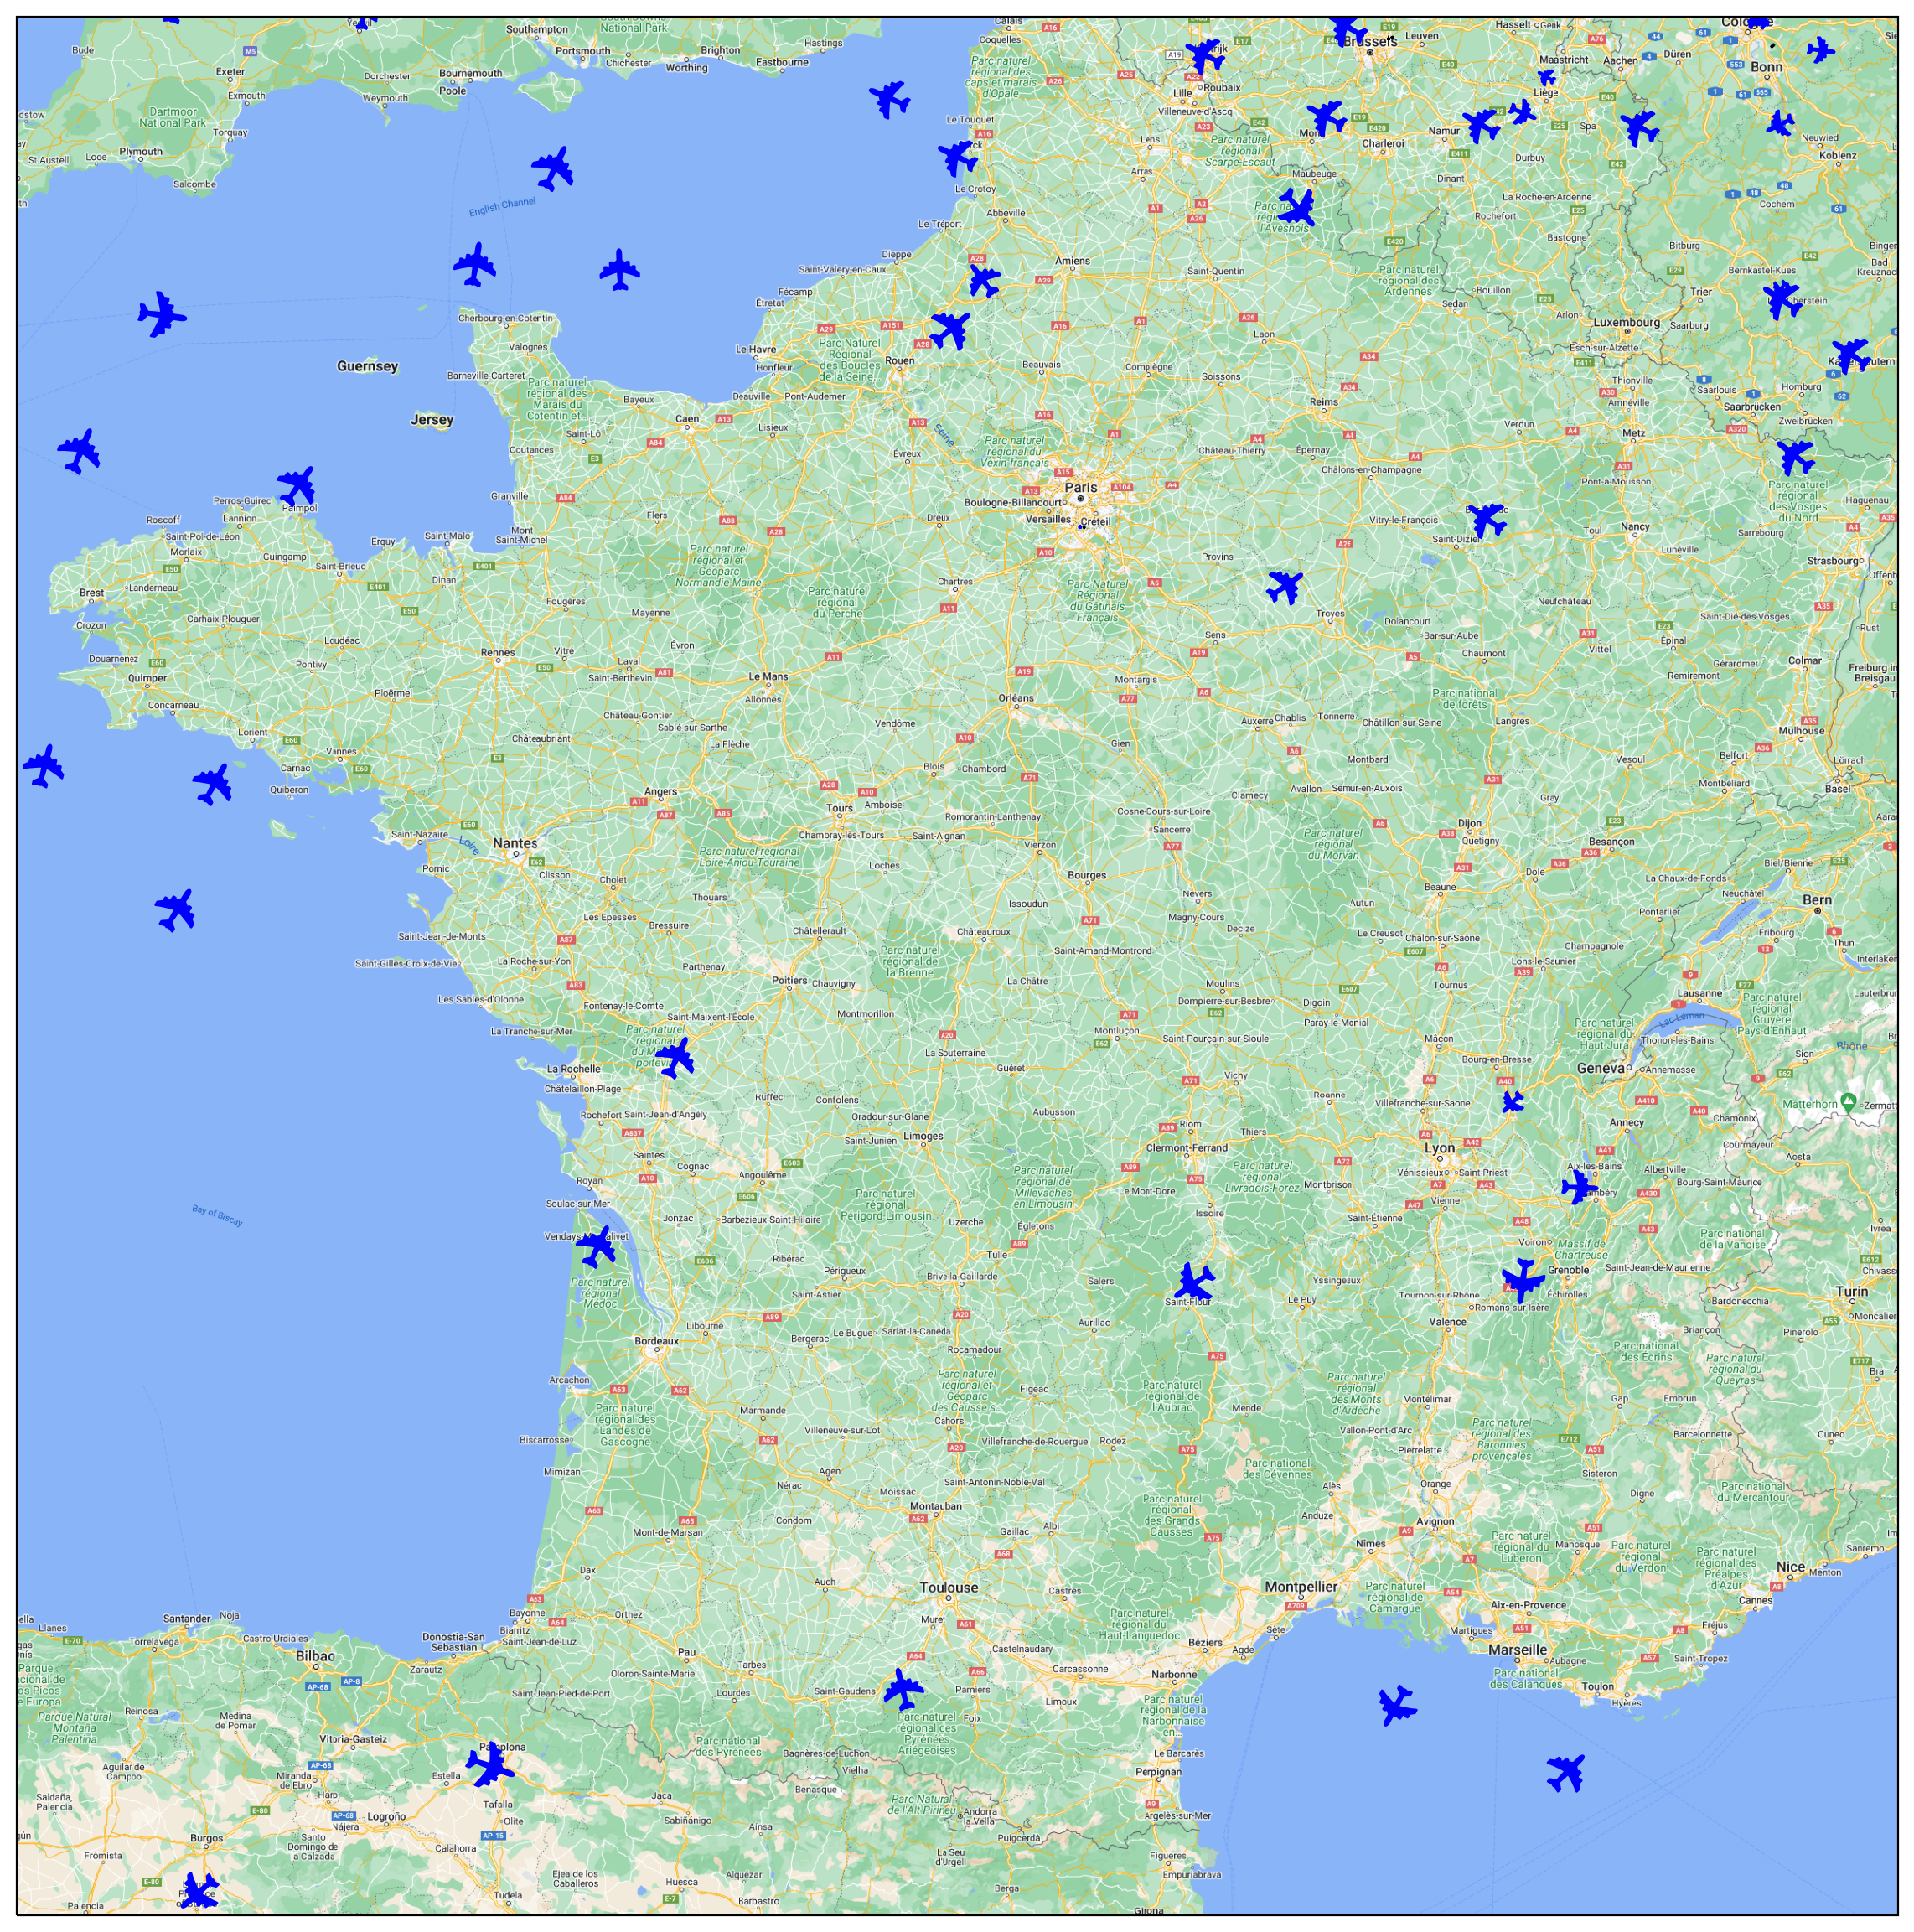

In [23]:
# Création d'une nouvelle figure de 15 pouces de large et de haut. 
# Le dpi (dots-per-inch) c'est la résolution de la figure
fig = plt.figure(figsize=(15,15),dpi=200)  

# Implémentation de la recherche de tuiles web en utilisant le système de coordonnées Google WTS.
tile = cimgt.GoogleTiles("RGB")

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=tile.crs)

# Limitation de l'étendue de la carte à une petite plage de longitude/latitude.
ax.set_extent([-5, 8, 42, 51], crs=ccrs.Geodetic())

# Addition de la tuile aux axes au niveau de zoom 8
ax.add_image(tile, 8)

# Création d'un chemin à partir du texte avec TextPath.
# Le symbole unicode U+2708 est utilisé.
SUCCESS_SYMBOLS = TextPath((0, 0), "✈")

# Tous les avions sont ajoutés/dessinés sur la carte.
for af in ciel:
    # Création d'un MarkerStyle pour pouvoir le faire tourner arbitrairement.
    m = MarkerStyle(SUCCESS_SYMBOLS)
    
    # Rotation du marker
    # Ajoutez 90 degrés pour que le symbole X soit orienté vers le nord lorsqu'il est à 0 degré.
    # L'attribut "true_track" est soustrait afin que l'angle soit positif du côté droit, 
    # comme expliqué sur ce site web : https://www.skybrary.aero/articles/heading-track-and-radial
    m._transform = m.get_transform().rotate_deg(90 - af.true_track)
    
    # Définition de la couleur du marker
    if af.velocity > 10:
        color='b'
    else: 
        color="k"
        
    # L'avion est ajouté à la carte en fonction de ses valeurs de latitude et de longitude.
    # La taille de la figure dépend directement de la vitesse actuelle de l'avion.
    ax.plot(af.longitude, af.latitude, 
            marker=m,
            color=color, markersize=50*af.velocity/300, transform=ccrs.Geodetic())

    # La figure est affichée
plt.show()

In [110]:
%load_ext autoreload
%autoreload 2

### Données historiques

Charger les données fournies avec pandas: https://box.ec-nantes.fr/index.php/s/pR5bfaFdncMZdcy. Il s'agit d'une version allégée, du dump hebdomadaire (450Mo) des données de opensky-network.
- Que contient le fichier?
- Quelle plage temporelle? 
- Donner quelques données moyennes : vitesse, position, nombre d'avions par tranche horaire.
- On en profitera pour mesurer le temps (non négligeable) pour effectuer ces calculs.

**Réduire les données pour pouvoir tracer**
Une fois que l'on a bien les données en main on s'intéresse au déplacement d'un seul appareil (comme pour nos deux influenceurs).

- Comment ces données s'intègrent-t-elles dans la classe avion que l'on a créée précédement? 
- Proposer un refactoring qui permette d'éviter les doublons lorsque l'on souhaite traver les trajectoires d'un appareil au cours d'une journée
- Implémenter ces changements.
- Tracer un vol de votre choix (parametres à déterminer) trajectoire journalière avec une approche similaire à l'exercice précédent.
- Pour les plus motivés, on pourra traver tous les vols de la journée!
![traj](trajectoire.jpg)

In [14]:
import pandas as pd
import numpy as np
import os
import datetime

In [64]:
os.chdir('/Users/dgalembeck/Documents/Coding/PAPY/#3.2')
df = pd.read_csv('/Users/dgalembeck/Documents/Coding/PAPY/#3.2/flights_1day.csv')

df = df.dropna()
df.sort_values(by = ['time'])
df.head()

Unnamed: 0        time  icao24        lat         lon    velocity  \
0           0  1656295200  a7e152  40.915553  -87.592496  245.074124   
1           1  1656295200  a8f975  40.943810  -88.107543  196.871475   
2           2  1656295200  7c6d39 -34.748592  139.072666  215.881446   
3           3  1656295200  ad6ff2  41.889038  -87.875332  131.028796   
4           4  1656295200  a537ed  42.287587  -86.857271  228.232894   

      heading  vertrate  callsign  onground  geoaltitude  
0  139.085617   0.32512  DAL2356      False     10561.32  
1  187.960714  -5.52704  ENY3658      False      4320.54  
2   51.190929  11.05408  VOZ1447      False      6949.44  
3  136.909152  15.93088  AAL1173      False      1196.34  
4   86.898971   6.17728  RPA4798      False      6697.98

#TODO
Le fichier est une .csv avec 

La plage temporelle est de 59min et 50s, du 27 juin 2022 à 4h jusqu'à 4h59min50s du même jour. Comme on peut voir ci-dessus.



In [65]:
# Comme le time est donné en un entier répresentant le secondes après Linux Epoch time (00:00:00,  1 janvier 1970), 
# il suffit de convertir le plus grand et plus petit entir pour obtenir la plus grande et plus petite date

print('The first date was on:', datetime.datetime.fromtimestamp(min(df.time)))
print('The last date was on:', datetime.datetime.fromtimestamp(max(df.time)))
print(len(df.onground))

The first date was on: 2022-06-27 04:00:00
The last date was on: 2022-06-27 04:59:50
1659742


On va calculer la vitesse et position moyenne et aussi le nombre d'avions uniques en air chaque 10s, 1min et 10min.

In [109]:
print('Vitesse moyenne de tous les avions pendant tout le période :', np.mean(df.velocity))
print('Position moyenne (latitude moyenne, longitude moyenne) de tous les avions pendant tout le période :', (np.mean(df.lat), np.mean(df.lon)))

# Every 10 seconds
seconds = list(set(df.time))
seconds.sort()
for k in seconds:
    val = len(set(df[(df.time == k) & (df.onground == False)].icao24))
    print('At {}, there were {} differents planes flying'.format(datetime.datetime.fromtimestamp(k), val))

# In a space of 1min, how many different planes flew during that time
interval = 60
minutes = list(set([k if (k - list(seconds)[0])%interval == 0 else 1 for k in seconds]))
minutes.sort()
minutes.remove(1)
for k in range(len(minutes) - 1):
    val = len(set(df[(df.time > minutes[k]) & (df.time < minutes[k+1]) & (df.onground == False)].icao24))
    print('Between {} and {}, {} different planes flew'.format(datetime.datetime.fromtimestamp(minutes[k]), datetime.datetime.fromtimestamp(minutes[k+1]),val))


# In a space of 10min, how many different planes flew during that time
interval = 600
tenminutes = list(set([k if (k - list(seconds)[0])%interval == 0 else 1 for k in seconds]))
tenminutes.sort()
tenminutes.remove(1)
for k in range(len(tenminutes) - 1):
    val = len(set(df[(df.time > tenminutes[k]) & (df.time < tenminutes[k+1]) & (df.onground == False)].icao24))
    print('Between {} and {}, {} different planes flew'.format(datetime.datetime.fromtimestamp(tenminutes[k]), datetime.datetime.fromtimestamp(tenminutes[k+1]),val))

Vitesse moyenne : 186.07288491185633
Position moyenne (latitude moyenne, longitude moyenne) : (32.360635418136546, -35.446402330308636)
Between 2022-06-27 04:00:00 and 2022-06-27 04:10:00, 5133 different planes flew
Between 2022-06-27 04:10:00 and 2022-06-27 04:20:00, 5533 different planes flew
Between 2022-06-27 04:20:00 and 2022-06-27 04:30:00, 5472 different planes flew
Between 2022-06-27 04:30:00 and 2022-06-27 04:40:00, 5379 different planes flew
Between 2022-06-27 04:40:00 and 2022-06-27 04:50:00, 5385 different planes flew


#TODO
On peut voir que il prend > 3s pour faire les calculs de la celulle d'avant, où on a 3 grands boucles..